EDA for Heart Attack Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler



Print the first 5 rows

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable


In [2]:
data = pd.read_csv("./heart.csv")
data.head()

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

data['chol_scaled'] = scaler_standard.fit_transform(data[['chol']])

# Apply Min-Max Scaling to 'trtbps' and 'thalachh'
data['trtbps_scaled'] = scaler_minmax.fit_transform(data[['trtbps']])
data['thalachh_scaled'] = scaler_minmax.fit_transform(data[['thalachh']])

Number of unique values in each column

In [3]:
data.shape

(303, 17)

In [4]:
data.nunique()

age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2
chol_scaled        152
trtbps_scaled       49
thalachh_scaled     91
dtype: int64

Age, Trtbps, chol, thalchh, and old peak are continuous categories

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.436634e+01,9.082101,29.00000,47.500000,55.000000,61.000000,77.000000
sex,303.0,6.831683e-01,0.466011,0.00000,0.000000,1.000000,1.000000,1.000000
cp,303.0,9.669967e-01,1.032052,0.00000,0.000000,1.000000,2.000000,3.000000
trtbps,303.0,1.316238e+02,17.538143,94.00000,120.000000,130.000000,140.000000,200.000000
chol,303.0,2.462640e+02,51.830751,126.00000,211.000000,240.000000,274.500000,564.000000
fbs,303.0,1.485149e-01,0.356198,0.00000,0.000000,0.000000,0.000000,1.000000
restecg,303.0,5.280528e-01,0.525860,0.00000,0.000000,1.000000,1.000000,2.000000
thalachh,303.0,1.496469e+02,22.905161,71.00000,133.500000,153.000000,166.000000,202.000000
exng,303.0,3.267327e-01,0.469794,0.00000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.0,1.039604e+00,1.161075,0.00000,0.000000,0.800000,1.600000,6.200000


Type of Chest Pain vs Output

cp
0    27.272727
1    82.000000
2    79.310345
3    69.565217
Name: output, dtype: float64


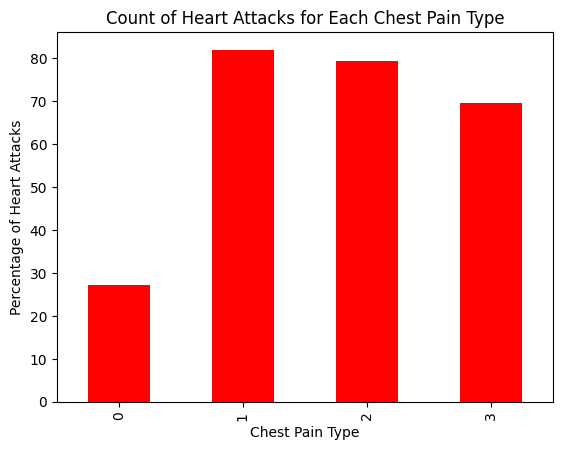

In [6]:
chest_pain_counts = data.groupby('cp')['output'].mean()*100
print(chest_pain_counts)
chest_pain_counts.plot(kind='bar', color='red')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage of Heart Attacks')
plt.title('Count of Heart Attacks for Each Chest Pain Type')
plt.show()

Chest Pain types 1 and 2 had higher percentage of high HA chances

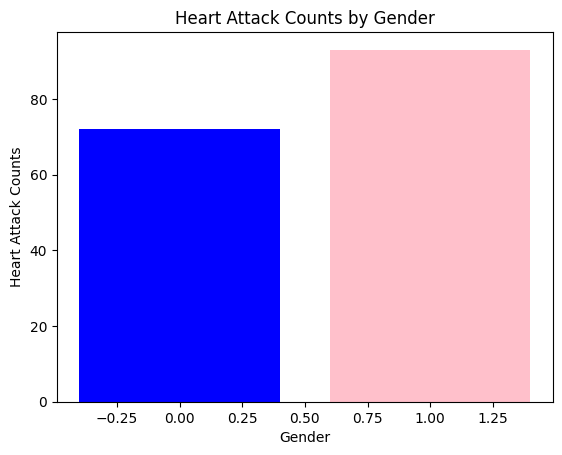

In [7]:
male_data = data[data['sex'] == 0]
female_data = data[data['sex'] == 1]

female_heart_attacks = female_data['output'].sum()
male_heart_attacks = male_data['output'].sum()

plt.bar([0,1], [male_heart_attacks,female_heart_attacks],color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Heart Attack Counts')
plt.title('Heart Attack Counts by Gender')
plt.show()

In this dataset, sex 0 had less higher chances of HA than sex 1

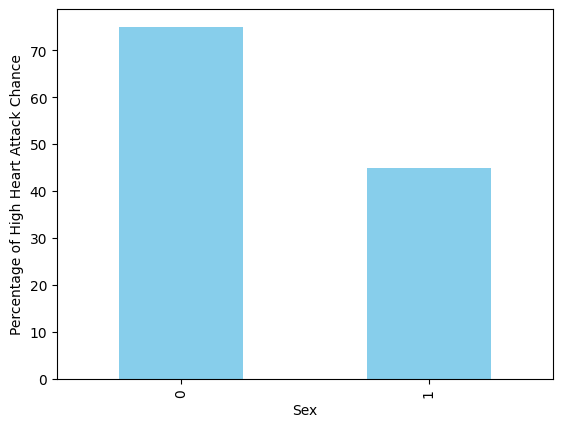

In [8]:
sex_percentage = data.groupby('sex')['output'].mean()*100
sex_percentage.plot(kind='bar', color='skyblue')
plt.xlabel("Sex")
plt.ylabel("Percentage of High Heart Attack Chance")
plt.show()

Sex 0 had a higher percentage of high HA than Sex 1

<Axes: xlabel='exng'>

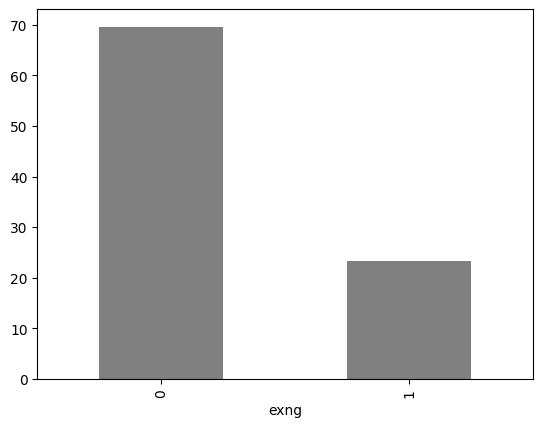

In [9]:
workout = data.groupby('exng')["output"].mean()*100
workout.plot(kind='bar', color='gray')

People with no excercise indiced angina have a sign higher chance of HA

SVM Preliminary Model

In [10]:
def get_top_correlated_features(data, output_column, n=5):
    corr_matrix = data.corr()
    
    corr_with_output = corr_matrix[output_column].abs().sort_values(ascending=False)
    
    top_features = corr_with_output.drop(output_column).head(n)
    
    return top_features

In [11]:
import shap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
print(get_top_correlated_features(data, 'output', 5))

exng               0.436757
cp                 0.433798
oldpeak            0.430696
thalachh           0.421741
thalachh_scaled    0.421741
Name: output, dtype: float64


In [13]:
def model(input_column):
    selected_columns = [input_column, 'output']
    train_data = data[selected_columns]

    X = train_data.drop('output', axis=1)
    y = train_data['output']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auroc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(input_column)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auroc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    explainer = shap.Explainer(svm_model, X_train)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)



exng
Precision: 0.6842
Recall: 0.8125
Accuracy: 0.7049


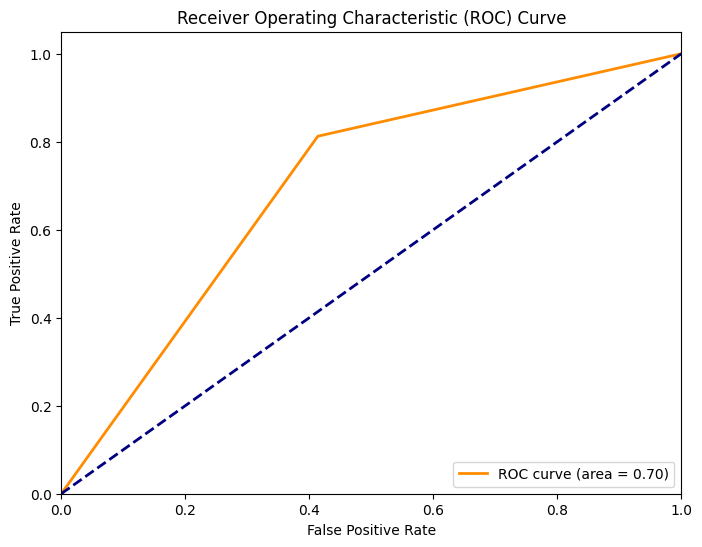

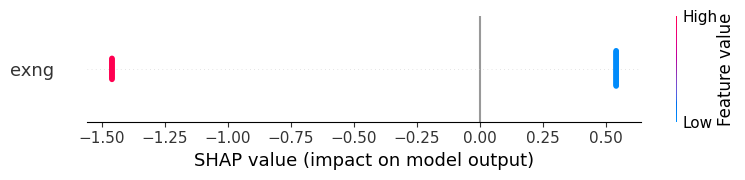

cp
Precision: 0.8929
Recall: 0.7812
Accuracy: 0.8361


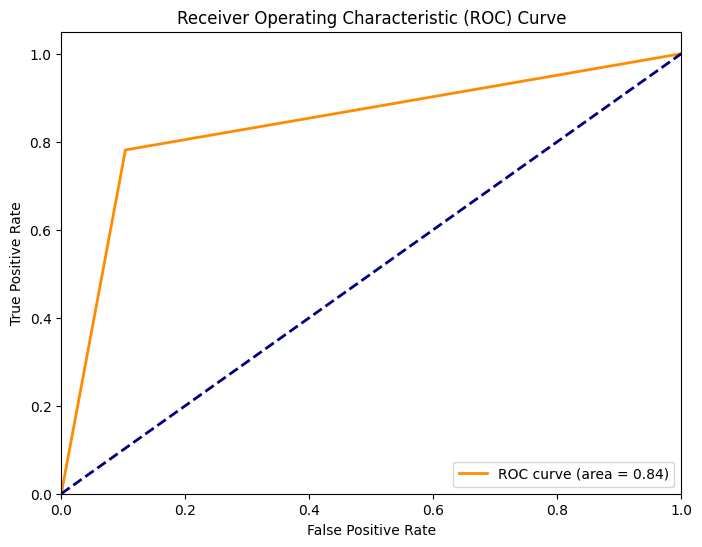

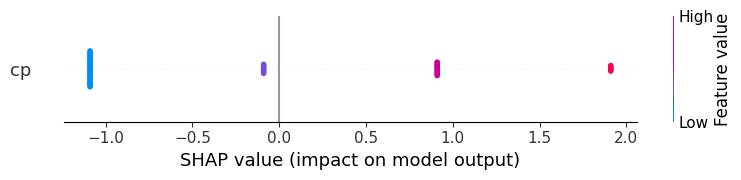

oldpeak
Precision: 0.6757
Recall: 0.7812
Accuracy: 0.6885


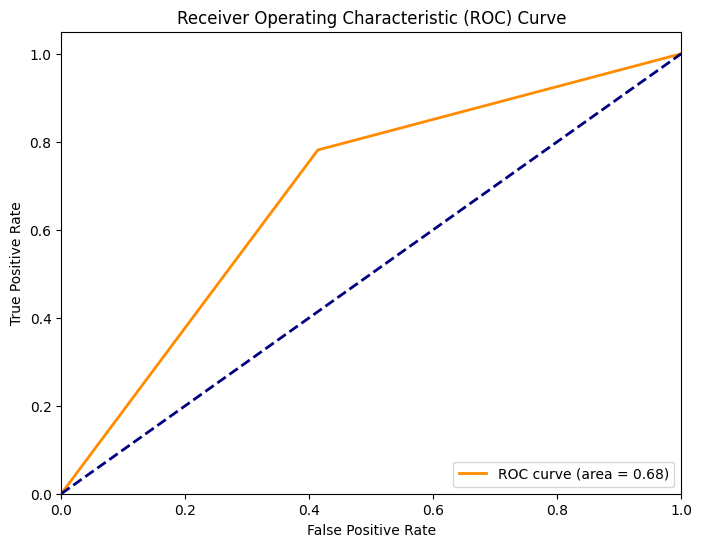

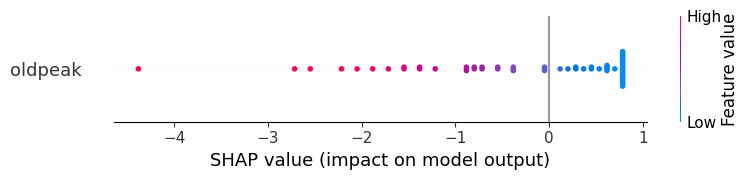

thalachh
Precision: 0.6923
Recall: 0.8438
Accuracy: 0.7213


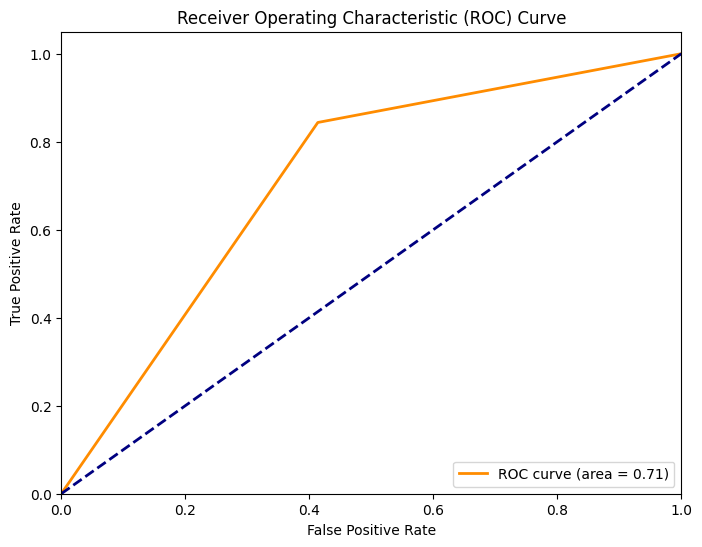

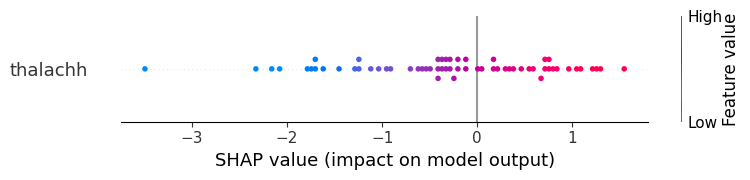

caa
Precision: 0.6744
Recall: 0.9062
Accuracy: 0.7213


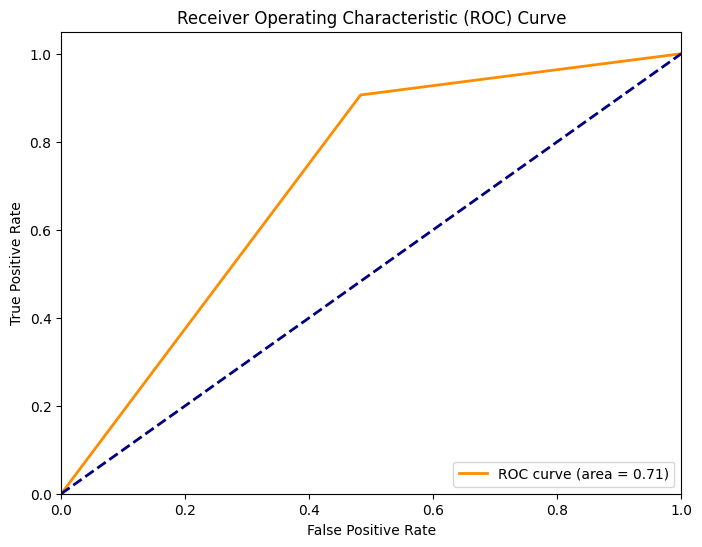

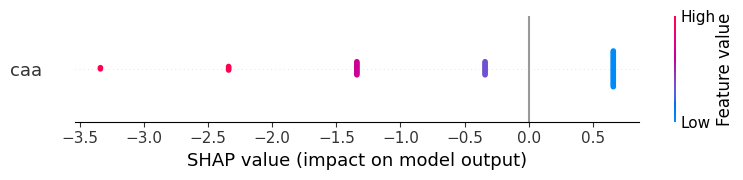

In [14]:
model('exng')
model('cp')
model('oldpeak')
model('thalachh')
model('caa')


Pipeline Attempt

Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best f1: 0.8355063910612358
Precision on the test set: 0.9000
Accuracy on the test set: 0.8689
Recall on Test Set: 0.84375


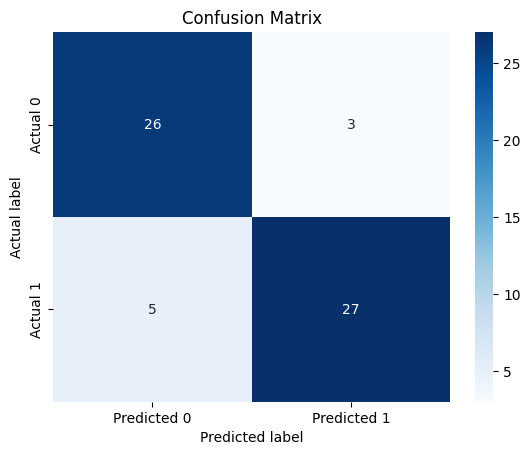

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import pickle

df = pd.read_csv('heart.csv')
X = df.drop('output', axis=1)
y = df['output']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC(probability=True)) 
])

# Define a parameter grid
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],  
    'svc__C': [0.1, 1, 10],                    
    'svc__gamma': ['scale', 'auto']            
}


grid_search = GridSearchCV(pipe, param_grid, scoring='f1', cv=5)


grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best f1:", grid_search.best_score_)

best_model = grid_search.best_estimator_

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision on the test set: {precision:.4f}")
print(f"Accuracy on the test set: {accuracy:.4f}")
test_recall = recall_score(y_test, y_pred)
print("Recall on Test Set:", test_recall)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()